### Plotting the prediction result

In [1]:
from plotnine import *
import pandas as pd
import torch
from torcheval.metrics import R2Score
import numpy as np

In [2]:
file_path = "sample_output.tsv"
df = pd.read_csv(file_path, sep='\t', header=0)

In [3]:
#preferable dataframe format
df

,GENE,true,null_predicted,CHR,full_predicted
0,ENSG00000187634,1.17810,1.920630,1,2.415547
1,ENSG00000188976,2.07930,1.661716,1,2.375189
2,ENSG00000187961,2.02400,1.585358,1,2.616214
3,ENSG00000187583,3.00430,1.988096,1,1.664940
4,ENSG00000187642,4.79070,1.656217,1,1.484950
...,...,...,...,...,...
17611,ENSG00000100288,1.29840,1.877902,22,2.203761
17612,ENSG00000008735,0.91926,1.791486,22,1.613232
17613,ENSG00000100299,2.19940,1.833341,22,2.283393
17614,ENSG00000100312,0.76371,1.746310,22,2.135521


In [4]:
#scatter plot (of the predicted vs. the true values)
def scatter(dataframe, x, y, x_label, y_label, color=None, alpha=0.1, smooth=True, facet=None):
    if color is not None:
        dataframe[color] = pd.Categorical(dataframe[color])
        p = ggplot(dataframe, aes(x, y, color=color)) + geom_point(alpha=alpha) + labs(x=x_label, y=y_label)
    else:
        p = ggplot(dataframe, aes(x, y)) + geom_point(alpha=alpha) + labs(x=x_label, y=y_label)
    if smooth:
        p += geom_smooth(method="lm")
    if facet:
        p += facet_wrap("~" + facet)
    return p

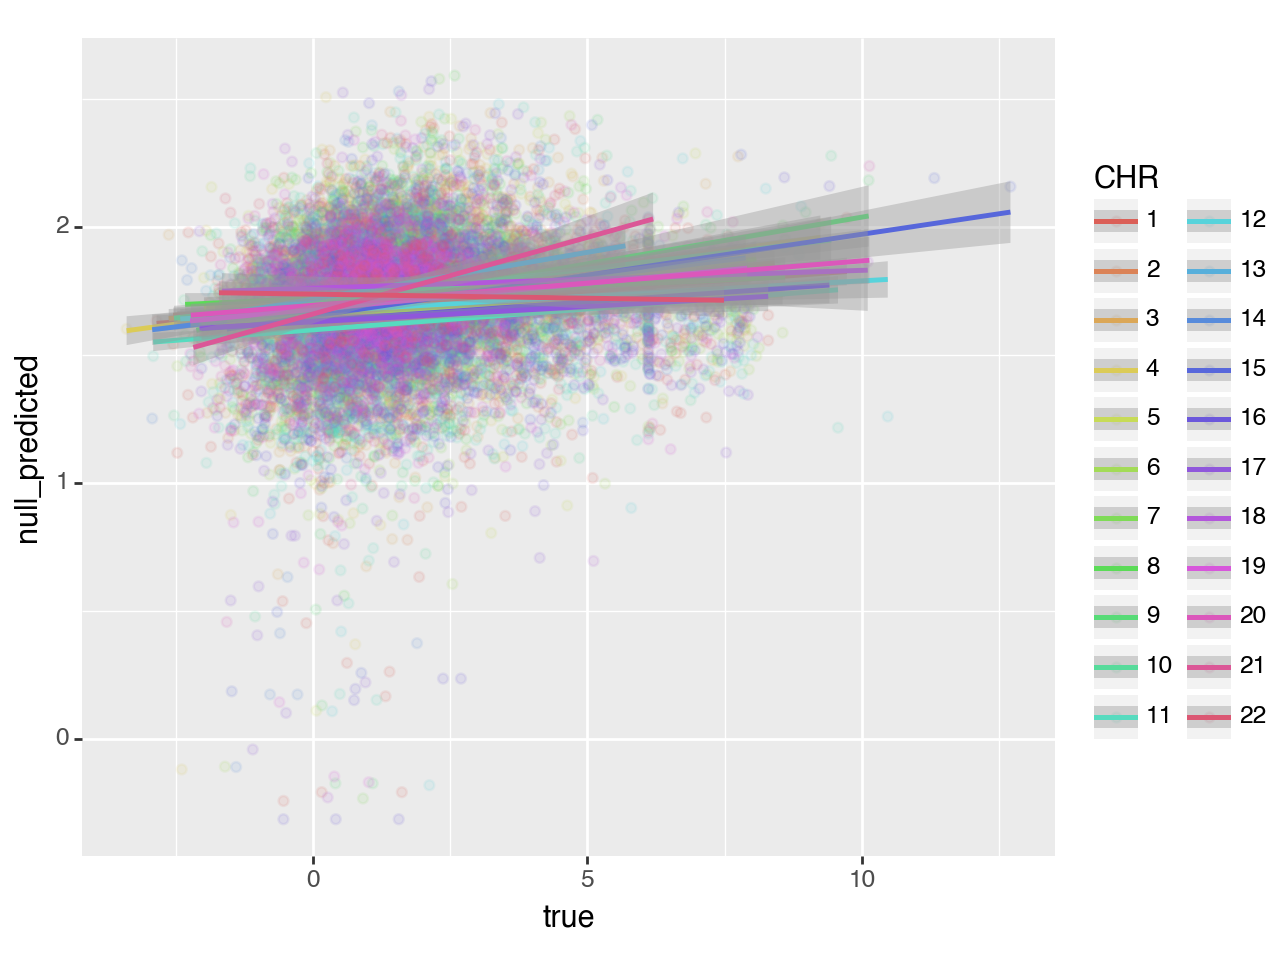

<Figure Size: (640 x 480)>

In [5]:
scatter(df, "true", "null_predicted", "true", "null_predicted", color = "CHR", smooth=True)

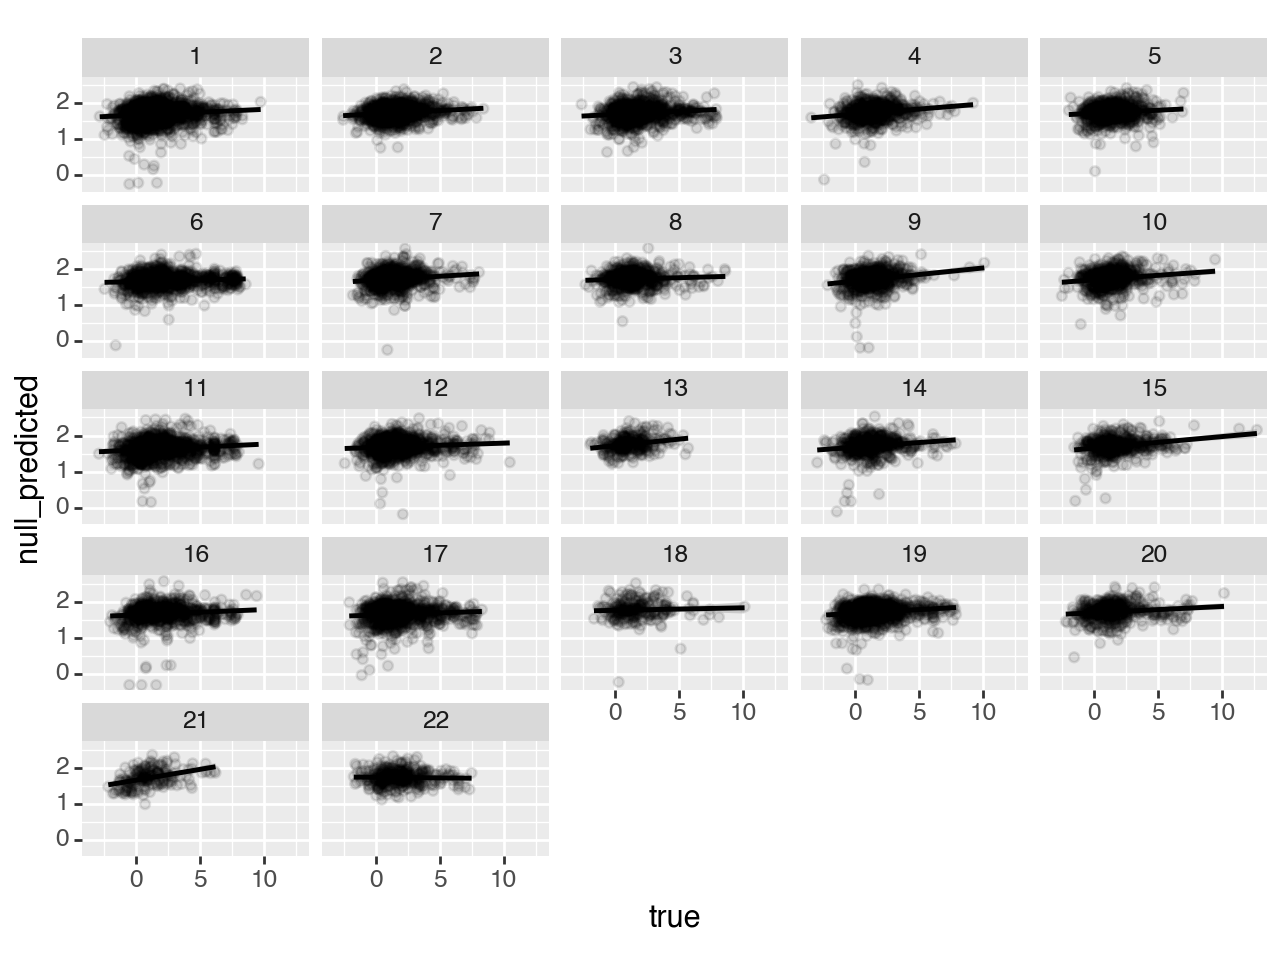

<Figure Size: (640 x 480)>

In [6]:
scatter(df, "true", "null_predicted", "true", "null_predicted", facet = "CHR", smooth=True)

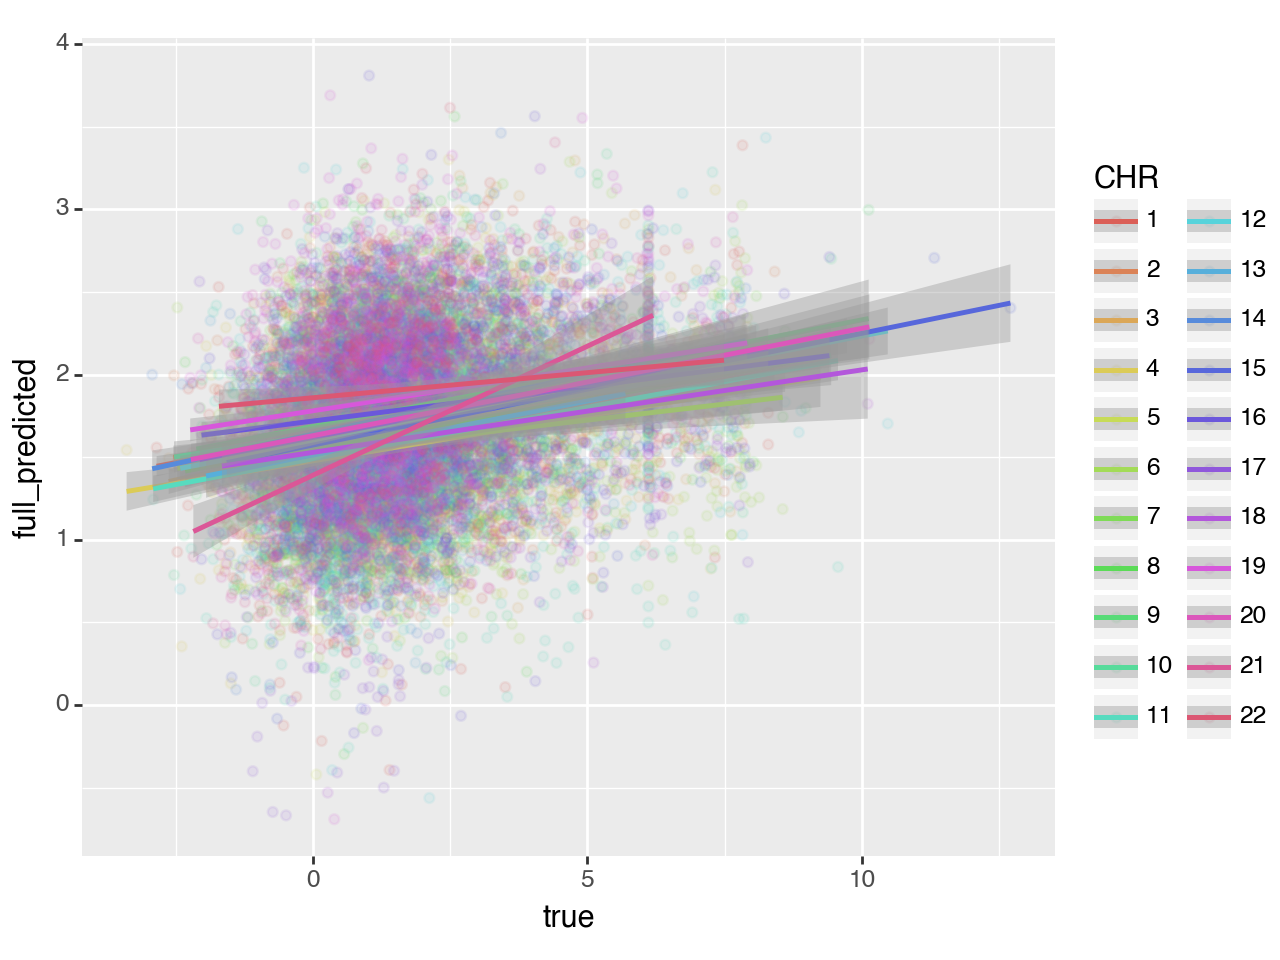

<Figure Size: (640 x 480)>

In [7]:
scatter(df, "true", "full_predicted", "true", "full_predicted", color = "CHR", smooth=True)

In [8]:
#plot the different prediction models
def null_full_scatter(dataframe, x="true", y1="null_predicted", y2="full_predicted", x_label="true_value", y_label="predicted_value", alpha = 0.1, smooth=True, facet=None):
    varlist = dataframe.columns.tolist()
    varlist.remove(y1)
    varlist.remove(y2)
    df = pd.melt(dataframe, id_vars = varlist, value_vars = [y1, y2], value_name = "predicted", var_name = "model")
    
    p = ggplot(df, aes(x, "predicted", color="model")) + geom_point(alpha=alpha) + labs(x=x_label, y=y_label)

    if smooth:
        p += geom_smooth(method="lm")
    if facet:
        p += facet_wrap("~" + facet)
    return p

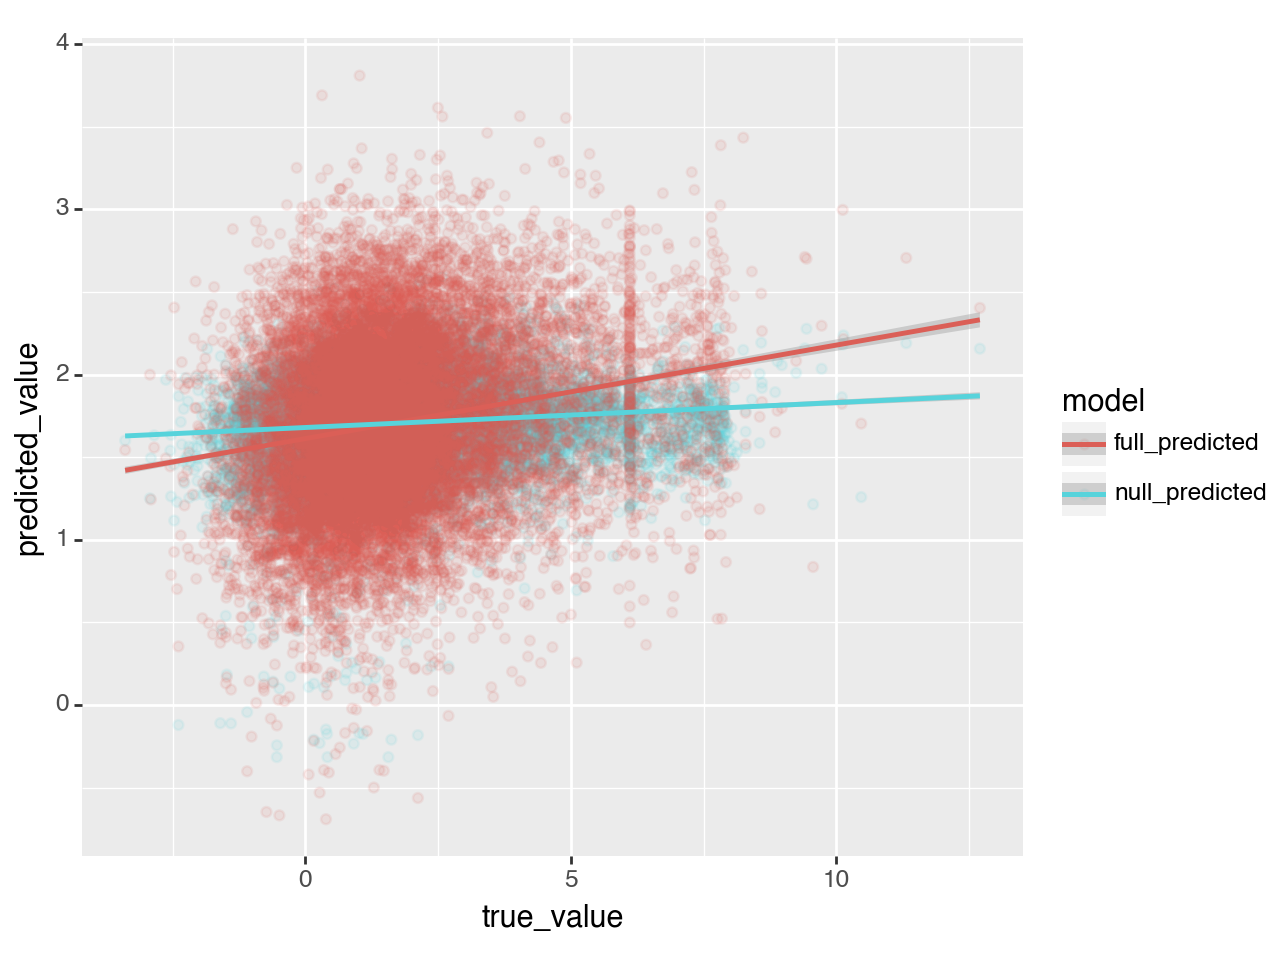

<Figure Size: (640 x 480)>

In [9]:
null_full_scatter(df)

In [10]:
#plot the r score
def plot_r2(dataframe=None, true = "true", null = "null_predicted", full="full_predicted", r2_null=None, r2_full=None):
    if dataframe is not None:
        r2_null=[]
        r2_full=[]
        for i in range(1,23):
            df = dataframe.query("CHR == @i")
            r2_null.append(R2Score().update(torch.tensor(df[null].values), torch.tensor(df[true].values)).compute().numpy())
            r2_full.append(R2Score().update(torch.tensor(df[full].values), torch.tensor(df[true].values)).compute().numpy())
    r2 = pd.DataFrame({
            "r2_null": np.array(r2_null),
            "r2_full": np.array(r2_full),
            "r2_delta": (np.array(r2_full) - np.array(r2_null))})
    df1 = pd.melt(r2, value_vars=["r2_null", "r2_full"], var_name="model", value_name="r2")
    p1 = ggplot(df1, aes("model","r2")) + geom_boxplot()
    p2 = ggplot(r2, aes("r2_delta")) + geom_histogram()
    return p1, p2
    

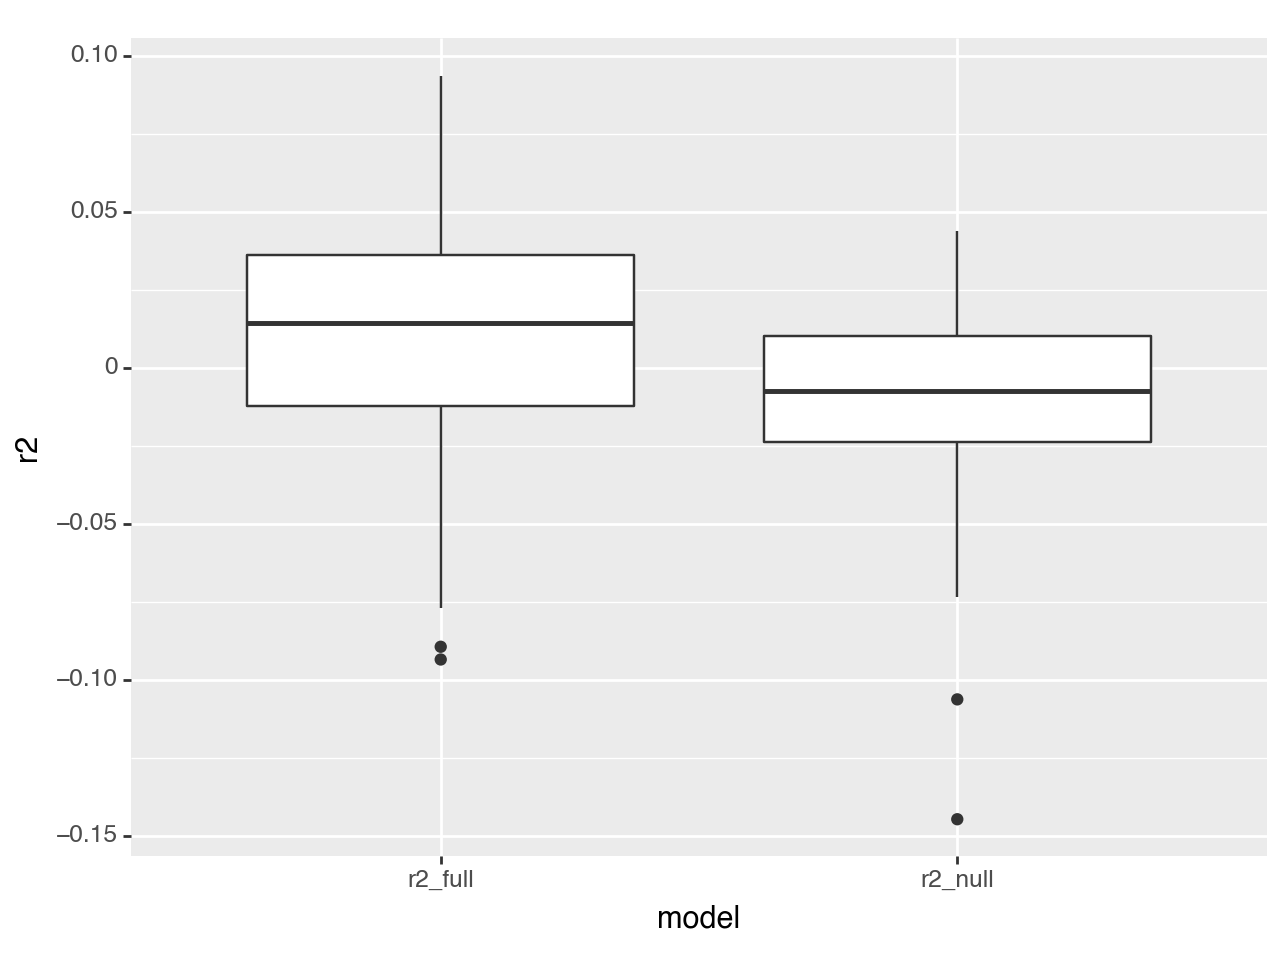

/Users/zkm/miniforge3/envs/sheet5/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 12'. Pick better value with 'binwidth'.


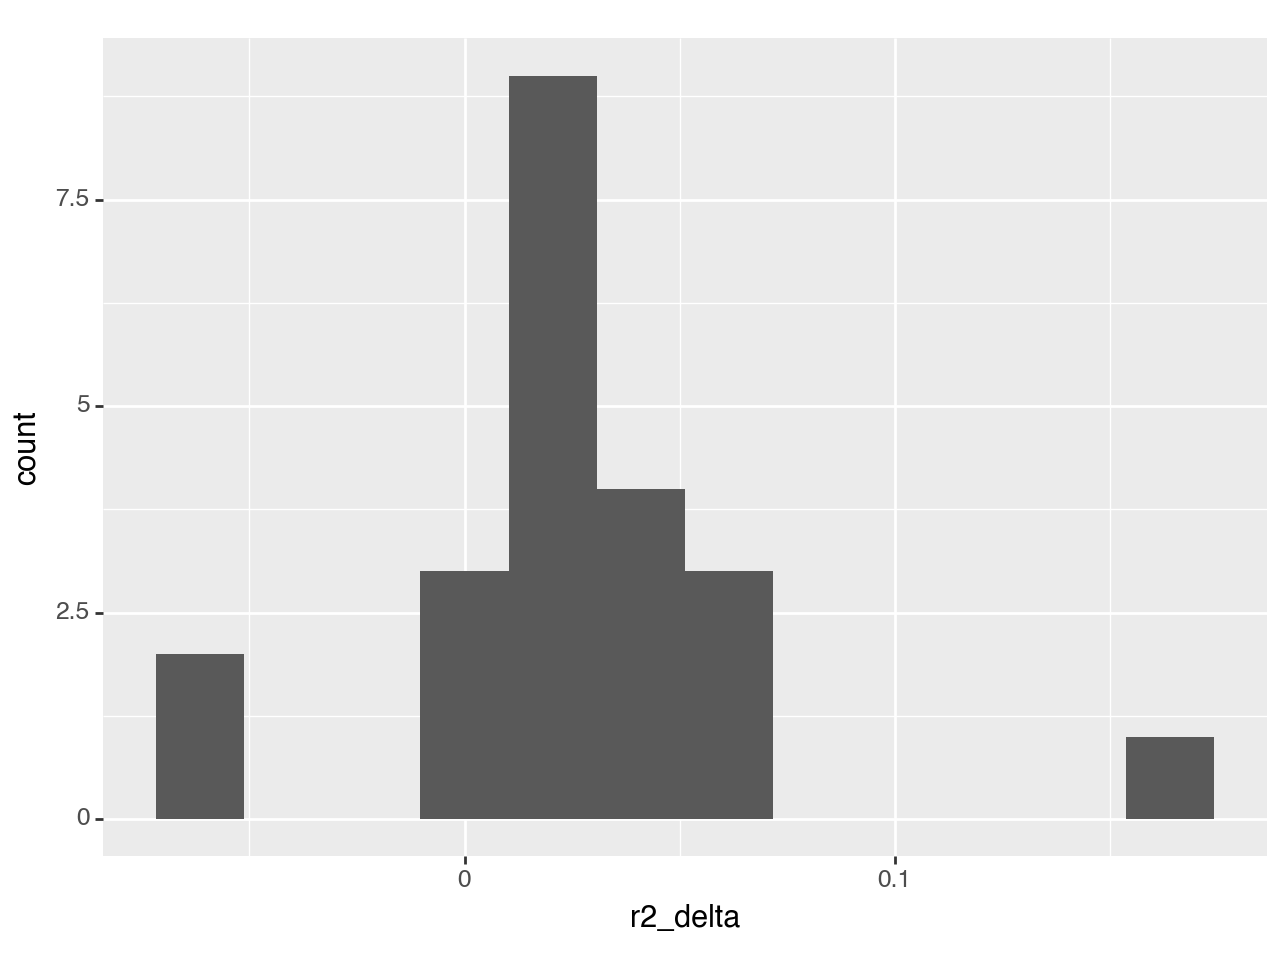

(<Figure Size: (640 x 480)>, <Figure Size: (640 x 480)>)

In [11]:
plot_r2(df)

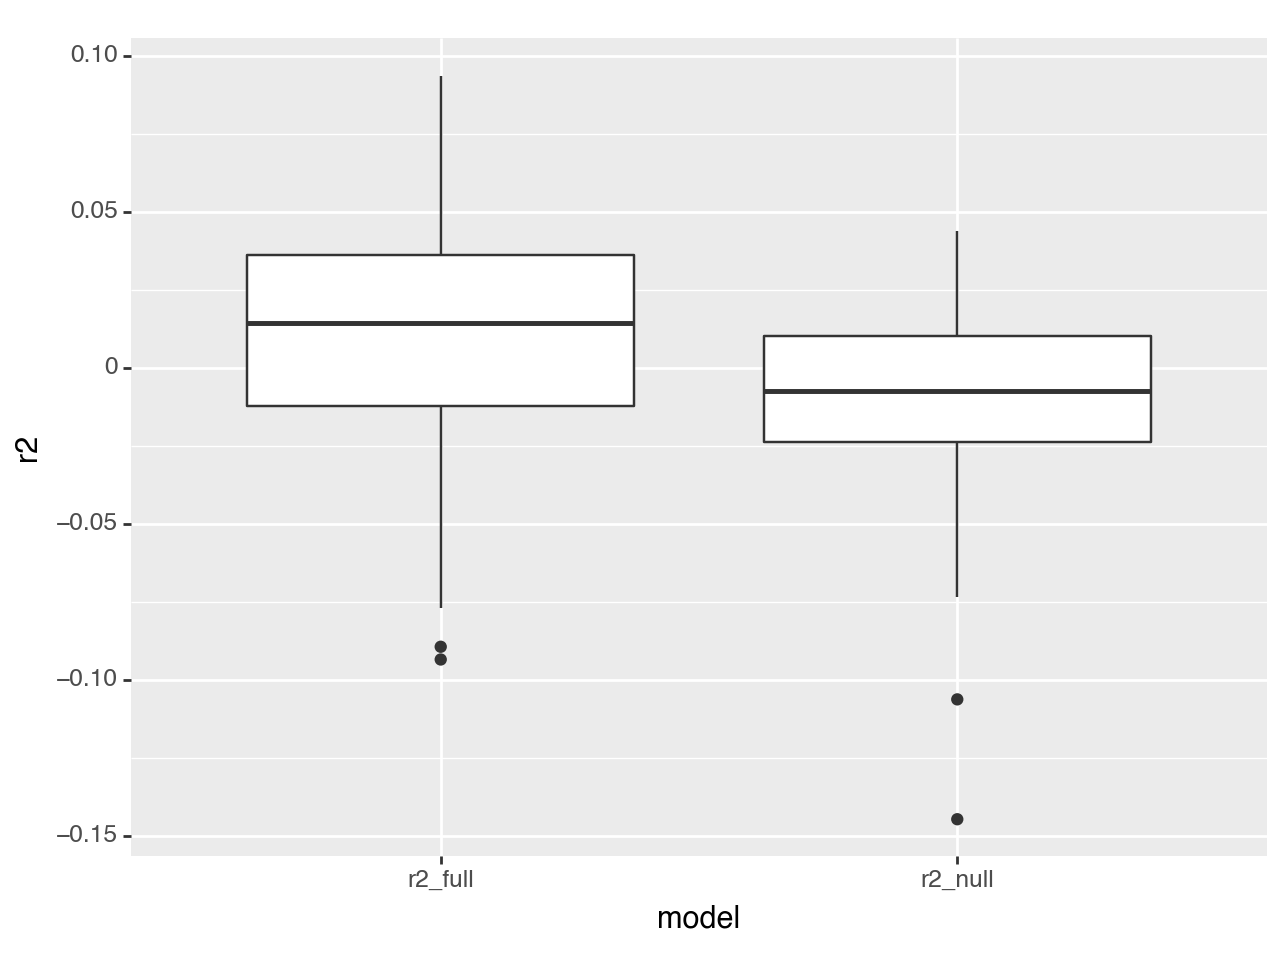

/Users/zkm/miniforge3/envs/sheet5/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 12'. Pick better value with 'binwidth'.


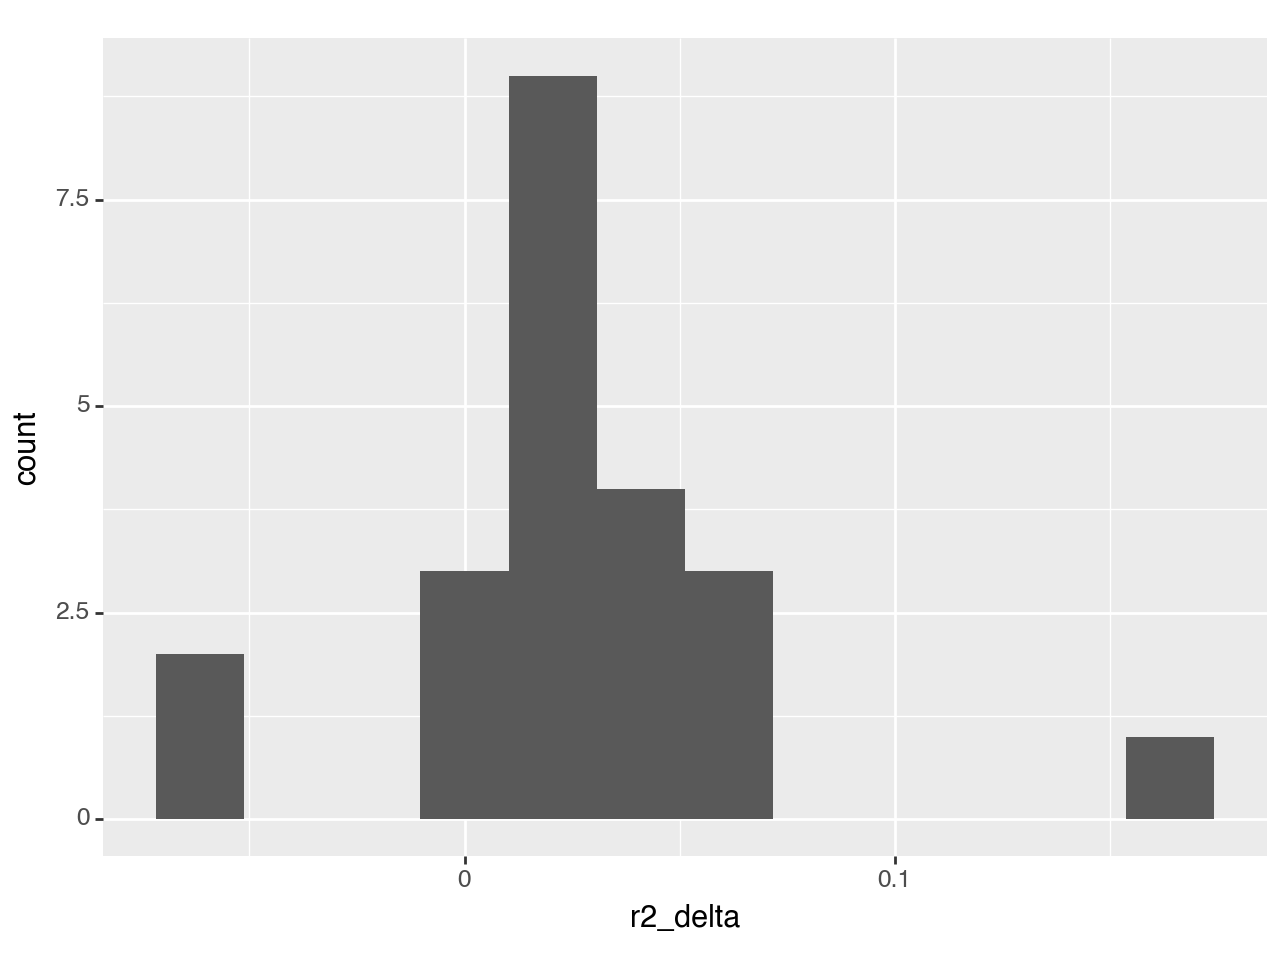

(<Figure Size: (640 x 480)>, <Figure Size: (640 x 480)>)

In [12]:
plot_r2(df)